In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("model_data.csv")

In [47]:
data


,남녀구분코드,연령,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,입회경과개월수_신용,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,...,이용건수_할부_R3M,이용건수_체크_R3M,이용금액_일시불_R3M,이용금액_할부_R3M,이용금액_체크_R3M,이용개월수_일시불_R3M,이용개월수_할부_R3M,이용개월수_체크_R3M,이용금액_업종기준,청구금액_B0
0,2,40,0,0,0,166,0,0,0,0,...,0,0,-151346,1272,0,0,0,0,0,0
1,1,30,0,0,0,103,0,0,0,0,...,0,0,-53212,-751,0,0,0,0,0,0
2,2,60,0,0,0,8,0,0,0,0,...,0,0,-136007,486,0,0,0,0,0,0
3,2,30,0,0,0,2,2,18,0,1,...,0,0,286,-322,0,0,0,0,0,0
4,1,40,0,0,0,72,0,0,0,0,...,0,0,-41710,5646,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402403,2,30,1,1,1,12,1,100,0,0,...,0,65,2034931,4213,1273824,3,0,3,2609498,545240
2402404,1,50,1,1,1,238,0,0,0,0,...,0,0,1855476,6057,0,3,0,0,1757901,482890
2402405,1,60,1,1,1,155,0,0,0,0,...,5,0,265021,1122765,0,3,3,0,1168912,283670
2402406,2,30,1,1,0,36,0,0,0,0,...,0,0,4413178,3524,0,3,0,0,5873113,880468


In [3]:
data['청구금액_B0'] = data['청구금액_B0'].apply(lambda x: 1 if x > 0 else x)


In [4]:
data.columns

Index(['남녀구분코드', '연령', '회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론',
       '입회경과개월수_신용', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내',
       '유효카드수_신용체크', '유효카드수_신용', '유효카드수_체크', '마케팅동의여부', '이용금액_R3M_신용체크',
       '이용금액_R3M_신용', '이용건수_일시불_B0M', '이용건수_체크_B0M', '이용건수_할부_B0M',
       '이용금액_일시불_B0M', '이용금액_체크_B0M', '이용금액_할부_B0M', '최종이용일자_일시불', '최종이용일자_체크',
       '최종이용일자_할부', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_체크', '이용건수_일시불_R12M',
       '이용건수_할부_R12M', '이용건수_체크_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M',
       '이용금액_체크_R12M', '최대이용금액_일시불_R12M', '최대이용금액_할부_R12M', '최대이용금액_체크_R12M',
       '이용개월수_일시불_R12M', '이용개월수_할부_R12M', '이용개월수_체크_R12M', '이용건수_일시불_R6M',
       '이용건수_할부_R6M', '이용건수_체크_R6M', '이용금액_일시불_R6M', '이용금액_할부_R6M',
       '이용금액_체크_R6M', '이용개월수_일시불_R6M', '이용개월수_할부_R6M', '이용개월수_체크_R6M',
       '이용건수_일시불_R3M', '이용건수_할부_R3M', '이용건수_체크_R3M', '이용금액_일시불_R3M',
       '이용금액_할부_R3M', '이용금액_체크_R3M', '이용개월수_일시불_R3M', '이용개월수_할부_R3M',
       '이용개월수_체크_R3M', '이용금액_업종기준', '청구금액_B0'],
      d

In [5]:
# 이용건수 합치기 예시
data['이용건수_B0M'] = data[['이용건수_일시불_B0M', '이용건수_체크_B0M', '이용건수_할부_B0M']].sum(axis=1)
#data['이용건수_R12M'] = data[['이용건수_일시불_R12M', '이용건수_할부_R12M', '이용건수_체크_R12M']].sum(axis=1)
#data['이용건수_R6M'] = data[['이용건수_일시불_R6M', '이용건수_할부_R6M', '이용건수_체크_R6M']].sum(axis=1)
#data['이용건수_R3M'] = data[['이용건수_일시불_R3M', '이용건수_할부_R3M', '이용건수_체크_R3M']].sum(axis=1)

# 이용금액 합치기 예시
data['이용금액_B0M'] = data[['이용금액_일시불_B0M', '이용금액_체크_B0M', '이용금액_할부_B0M']].sum(axis=1)
#data['이용금액_R12M'] = data[['이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M']].sum(axis=1)
#data['이용금액_R6M'] = data[['이용금액_일시불_R6M', '이용금액_할부_R6M', '이용금액_체크_R6M']].sum(axis=1)
#data['이용금액_R3M'] = data[['이용금액_일시불_R3M', '이용금액_할부_R3M', '이용금액_체크_R3M']].sum(axis=1)

# 이용개월수 합치기 예시
data['이용개월수_R12M'] = data[['이용개월수_일시불_R12M', '이용개월수_할부_R12M', '이용개월수_체크_R12M']].sum(axis=1)
#data['이용개월수_R6M'] = data[['이용개월수_일시불_R6M', '이용개월수_할부_R6M', '이용개월수_체크_R6M']].sum(axis=1)
#data['이용개월수_R3M'] = data[['이용개월수_일시불_R3M', '이용개월수_할부_R3M', '이용개월수_체크_R3M']].sum(axis=1)

# 유효카드수 합치기 예시
data['유효카드수_총합'] = data[['유효카드수_신용체크', '유효카드수_신용', '유효카드수_체크']].sum(axis=1)

# 최종 이용일자 최신값 선택 (날짜 형식일 경우)
data['최종이용일자_종합'] = data[['최종이용일자_일시불', '최종이용일자_체크', '최종이용일자_할부']].max(axis=1)

# 필요 없는 원본 컬럼 제거 (선택 사항)
cols_to_drop = [
    '이용건수_일시불_B0M', '이용건수_체크_B0M', '이용건수_할부_B0M',
    '이용건수_일시불_R12M', '이용건수_할부_R12M', '이용건수_체크_R12M',
    '이용건수_일시불_R6M', '이용건수_할부_R6M', '이용건수_체크_R6M',
    '이용건수_일시불_R3M', '이용건수_할부_R3M', '이용건수_체크_R3M',
    '이용금액_일시불_B0M', '이용금액_체크_B0M', '이용금액_할부_B0M',
    '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_체크_R12M',
    '이용금액_일시불_R6M', '이용금액_할부_R6M', '이용금액_체크_R6M',
    '이용금액_일시불_R3M', '이용금액_할부_R3M', '이용금액_체크_R3M',
    '이용개월수_일시불_R12M', '이용개월수_할부_R12M', '이용개월수_체크_R12M',
    '이용개월수_일시불_R6M', '이용개월수_할부_R6M', '이용개월수_체크_R6M',
    '이용개월수_일시불_R3M', '이용개월수_할부_R3M', '이용개월수_체크_R3M',
    '유효카드수_신용체크', '유효카드수_신용', '유효카드수_체크',
    '최종이용일자_일시불', '최종이용일자_체크', '최종이용일자_할부',
    '이용금액_R3M_신용체크','탈회횟수_발급1년이내','이용금액_R3M_신용'
]

data.drop(columns=cols_to_drop, inplace=True)

In [6]:
data.columns

Index(['남녀구분코드', '연령', '회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론',
       '입회경과개월수_신용', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '마케팅동의여부',
       '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_체크', '최대이용금액_일시불_R12M',
       '최대이용금액_할부_R12M', '최대이용금액_체크_R12M', '이용금액_업종기준', '청구금액_B0', '이용건수_B0M',
       '이용금액_B0M', '이용개월수_R12M', '유효카드수_총합', '최종이용일자_종합'],
      dtype='object')

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬 계산
corr_matrix = data.corr().abs()  # 절댓값으로 변환

# 임계값 이상인 변수 쌍 찾기 (예: 0.7 이상)
threshold = 0.7
high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                         .stack()
                         .reset_index()
                         .rename(columns={0:'corr'}))

high_corr = high_corr[high_corr['corr'] > threshold]

print(high_corr.sort_values(by='corr', ascending=False))


       level_0         level_1      corr
234  이용금액_업종기준        이용금액_B0M  0.807233
243   이용건수_B0M        이용금액_B0M  0.782128
189  이용후경과월_할부  최대이용금액_할부_R12M  0.722815


In [11]:
X = data.drop(columns = '청구금액_B0')
y = data['청구금액_B0']

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF 계산
vif = pd.DataFrame()
vif["변수명"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                변수명        VIF
0            남녀구분코드   9.236961
1                연령  12.888490
2         회원여부_이용가능  30.989955
3      회원여부_이용가능_CA  13.669361
4     회원여부_이용가능_카드론   3.024469
5        입회경과개월수_신용   2.356845
6           탈회횟수_누적   3.484209
7          최종탈회후경과월   2.950277
8      탈회횟수_발급6개월이내   1.148570
9           마케팅동의여부   5.447848
10       이용후경과월_일시불   1.916707
11        이용후경과월_할부   9.430169
12        이용후경과월_체크  12.859192
13  최대이용금액_일시불_R12M   2.090483
14   최대이용금액_할부_R12M   2.863601
15   최대이용금액_체크_R12M   1.950424
16        이용금액_업종기준   6.361309
17         이용건수_B0M   4.503266
18         이용금액_B0M   9.937946
19       이용개월수_R12M   8.830253
20         유효카드수_총합   5.317505
21        최종이용일자_종합   0.005670


In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
# Hyperparameter tuning with RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}
rf_base = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
rf_cv.fit(X_train, y_train)
rf = rf_cv.best_estimator_  # tuned model
print('Best parameters:', rf_cv.best_params_)

RandomForestClassifier()

In [58]:
y_pred = rf.predict(X_test)

In [59]:
y_prob = rf.predict_proba(X_test)[:, 1]  # 이진 분류일 때 양성 클래스 확률


In [60]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("정확도:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


정확도: 0.9487047995178172
ROC AUC: 0.9871726731853299
              precision    recall  f1-score   support

           0       0.90      0.91      0.91    163238
           1       0.97      0.96      0.96    437364

    accuracy                           0.95    600602
   macro avg       0.93      0.94      0.94    600602
weighted avg       0.95      0.95      0.95    600602



In [61]:
from sklearn.metrics import precision_recall_curve, recall_score, precision_score, average_precision_score, f1_score, accuracy_score, roc_auc_score
import numpy as np

# 테스트 데이터에 대한 양성 클래스 확률 예측
y_test_pred_prob = rf.predict_proba(X_test)[:, 1]  # 수정: predict -> predict_proba

# 여러 임계값에서 precision, recall, thresholds 계산
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred_prob)

# thresholds 길이는 precisions, recalls 길이보다 1 작으므로, 마지막 값 제외하고 F1 스코어 계산
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-9)

# F1 Score가 최대가 되는 임계값 선택
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"최적의 임계값: {best_threshold:.4f}")

# 최적 임계값으로 클래스 예측
y_test_pred_class = (y_test_pred_prob >= best_threshold).astype(int)

# 성능 지표 출력
recall = recall_score(y_test, y_test_pred_class)
print(f"Test Recall: {recall:.4f}")

precision = precision_score(y_test, y_test_pred_class)
print(f"Test Precision: {precision:.4f}")

aucpr_score = average_precision_score(y_test, y_test_pred_prob)
print(f"AUC-PR: {aucpr_score:.4f}")

print(f"F1 Score  : {f1_score(y_test, y_test_pred_class):.4f}")

accuracy = accuracy_score(y_test, y_test_pred_class)
print(f"Accuracy: {accuracy:.4f}")

roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")


최적의 임계값: 0.5066
Test Recall: 0.9638
Test Precision: 0.9657
AUC-PR: 0.9952
F1 Score  : 0.9647
Accuracy: 0.9487
ROC-AUC: 0.9872


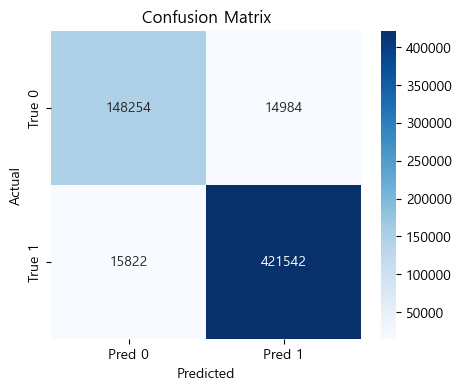

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 예측값과 실제값
cm = confusion_matrix(y_test, y_test_pred_class)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


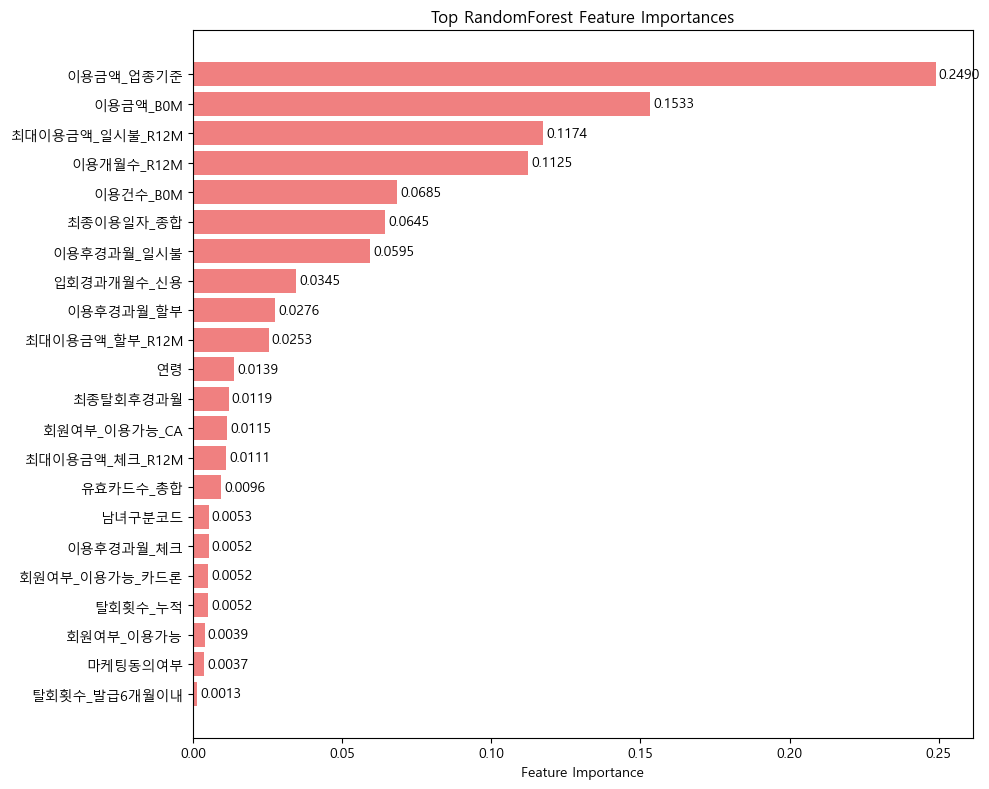

In [63]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (윈도우 기준: 'Malgun Gothic', 맥: 'AppleGothic', 리눅스: 'NanumGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'AppleGothic', 'NanumGothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# 중요도 추출
importances = rf.feature_importances_
features = X_train.columns

# DataFrame으로 정리
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 상위 30개만 시각화 (원하는 개수 조절 가능)
top_n = 30
top_features = importance_df.head(top_n)

# Bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(top_features['feature'][::-1], top_features['importance'][::-1], color='lightcoral')

# 수치 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center')

plt.xlabel('Feature Importance')
plt.title('Top RandomForest Feature Importances')
plt.tight_layout()
plt.show()